In [13]:
#### LIBRARY
import os
import tensorflow
import keras
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as matplot
import matplotlib
import seaborn as sb
import cv2
import numpy as np

In [14]:
##### DATASET ONE #######
from keras.datasets import mnist
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train.shape

(60000, 28, 28)

In [17]:
X_test.shape

(10000, 28, 28)

In [18]:
## RESHAPE 2D

nsamples, nx, ny = X_train.shape
d1_train_dataset = X_train.reshape((nsamples, nx*ny))

nsamples, nx, ny = X_test.shape
d1_test_dataset = X_test.reshape((nsamples, nx*ny))

In [19]:
d1_train_dataset[:500].shape

(500, 784)

In [20]:
d1_train_dataset[:500]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
# Function to List all the filenames in the directory
def img_list(path):
    return (os.path.join(path,f) for f in os.listdir(path))

In [22]:
####UTILISATION MODELE SVM
### DATASET 1
from sklearn.svm import SVC, LinearSVC # Support Vector for Classification


# param_C = 5
# param_gamma = 0.05
# classifier = SVC(C=param_C,gamma=param_gamma)
classifier = sklearn.linear_model.SGDClassifier()#SVC(kernel = 'linear', random_state = 0)
# classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(d1_train_dataset, y_train)


SGDClassifier()

In [23]:
predicted_y = classifier.predict(d1_test_dataset) # prédiction à partir de notre modèle entraîné sur le jeu de test
predicted_y_train = classifier.predict(d1_train_dataset) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)

In [24]:
print("Accuracy on training data is",accuracy_score(y_train, predicted_y_train)) #affichage du score de précision obtenu sur le jeu de training qui est de 99%
print("Accuracy on unknown data is",accuracy_score(y_test, predicted_y)) #affichage du score de précision obtenu sur le jeu de test "inconnu" qui est de 38%

Accuracy on training data is 0.8835
Accuracy on unknown data is 0.8693


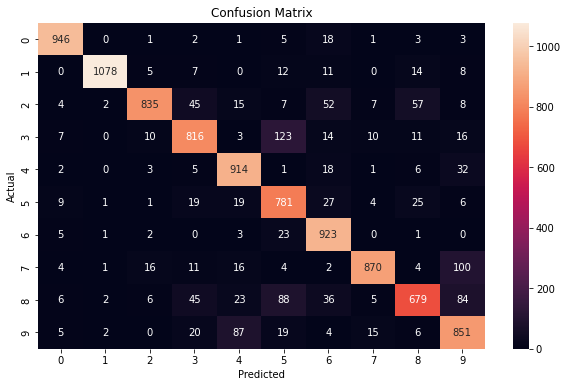

In [26]:
# Matrice de confusion
cm = confusion_matrix(y_test, predicted_y)

matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [27]:
###########################
##### DATASET TWO #########
###########################
train_path = "dataset/dog_cat/training_set"
test_path = "dataset/dog_cat/test_set"

class_names=os.listdir(train_path)

liste_dict = {}
for i in range(len(class_names)):
    liste_dict[class_names[i]] = int(i)


print(class_names) # ==> ['dogs', 'cats']


['cats', 'dogs']


In [28]:
dataset_dogcat = pd.DataFrame(columns=["Image_path", "Class", "Train/Test"])

for training_name in class_names:
    dir_=os.path.join(train_path,training_name)
    class_path=img_list(dir_)
#     for image_path in class_path:
#         dataset_dogcat = dataset_dogcat.append({"Image_path":image_path, "Y_value": liste_dict[training_name], "Class": training_name,  "Train/Test": "train"}, ignore_index = True)
    array = [d for d in class_path]
    df = pd.DataFrame({"Image_path": [d for d in array], "Y_value": liste_dict[training_name], "Class": training_name,  "Train/Test": "train"})    
    dataset_dogcat = dataset_dogcat.append(df, ignore_index=True)
    
    
for test_name in class_names:
    dir_=os.path.join(test_path,test_name)
    class_path=img_list(dir_)
#     for image_path in class_path:
#         dataset_dogcat = dataset_dogcat.append({"Image_path":image_path, "Y_value": liste_dict[test_name], "Class": test_name,  "Train/Test": "test"}, ignore_index = True)
    array = [d for d in class_path]
    df = pd.DataFrame({"Image_path": [d for d in array], "Y_value": liste_dict[test_name], "Class": test_name,  "Train/Test": "test"})    
    dataset_dogcat = dataset_dogcat.append(df, ignore_index=True)
    
    

In [29]:
dataset_dogcat

,Image_path,Class,Train/Test,Y_value
0,dataset/dog_cat/training_set\cats\cat.1.jpg,cats,train,0.0
1,dataset/dog_cat/training_set\cats\cat.10.jpg,cats,train,0.0
2,dataset/dog_cat/training_set\cats\cat.100.jpg,cats,train,0.0
3,dataset/dog_cat/training_set\cats\cat.1000.jpg,cats,train,0.0
4,dataset/dog_cat/training_set\cats\cat.1001.jpg,cats,train,0.0
...,...,...,...,...
9995,dataset/dog_cat/test_set\dogs\dog.4996.jpg,dogs,test,1.0
9996,dataset/dog_cat/test_set\dogs\dog.4997.jpg,dogs,test,1.0
9997,dataset/dog_cat/test_set\dogs\dog.4998.jpg,dogs,test,1.0
9998,dataset/dog_cat/test_set\dogs\dog.4999.jpg,dogs,test,1.0


In [30]:
X_train_data2 = []
y_train_data2 = dataset_dogcat[dataset_dogcat["Train/Test"] == "train"]["Y_value"].tolist()

In [31]:
image_size = (150, 150)

In [32]:
for i in range(len(dataset_dogcat[dataset_dogcat["Train/Test"] == "train"]["Image_path"])):
    im = cv2.imread(dataset_dogcat[dataset_dogcat["Train/Test"] == "train"]["Image_path"].iloc[i])
    X_train_data2.append(cv2.resize(im, image_size))  #pour chaque image du dataset, on redimensionne à la taille image_size

In [33]:
images = np.asarray(X_train_data2)
images.shape

(8000, 150, 150, 3)

In [34]:
images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(8000, 67500)


In [35]:
X_train_data2 = images

In [36]:
X_test_data2 = []
y_test_data2 = dataset_dogcat[dataset_dogcat["Train/Test"] == "test"]["Y_value"].tolist()

In [37]:
for i in range(len(dataset_dogcat[dataset_dogcat["Train/Test"] == "test"]["Image_path"])):
    im = cv2.imread(dataset_dogcat[dataset_dogcat["Train/Test"] == "test"]["Image_path"].iloc[i])
    X_test_data2.append(cv2.resize(im, image_size))

In [38]:
images = np.asarray(X_test_data2)
images.shape

(2000, 150, 150, 3)

In [39]:
images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(2000, 67500)


In [40]:
X_test_data2 = images

In [41]:
classifier = sklearn.linear_model.SGDClassifier()#SVC(kernel = 'linear', random_state = 0)
# classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_data2, y_train_data2)

SGDClassifier()

In [42]:
predicted_y = classifier.predict(X_test_data2) # prédiction à partir de notre modèle entraîné sur le jeu de test
predicted_y_train = classifier.predict(X_train_data2) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)

In [43]:
print("Accuracy on training data is",accuracy_score(y_train_data2, predicted_y_train,)) #affichage du score de précision obtenu sur le jeu de training qui est de 99%
print("Accuracy on unknown data is",accuracy_score(y_test_data2, predicted_y)) #affichage du score de précision obtenu sur le jeu de test "inconnu" qui est de 38%

Accuracy on training data is 0.951375
Accuracy on unknown data is 0.554


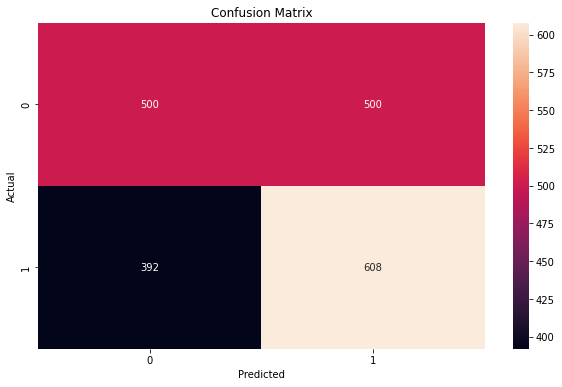

In [44]:
# Matrice de confusion
cm = confusion_matrix(y_test_data2, predicted_y)

matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [45]:
###########################
##### DATASET THREE #######
###########################
train_path_intel = "dataset/intel_image_classification/seg_train/seg_train"
test_path_intel = "dataset/intel_image_classification/seg_test/seg_test"
pred_path_intel = "dataset/intel_image_classification/seg_pred/seg_pred"

class_names_intel = os.listdir(train_path_intel)

liste_dict_intel = {}
for i in range(len(class_names_intel)):
    liste_dict_intel[class_names_intel[i]] = int(i)

print(class_names_intel)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [46]:
dataset_intel = pd.DataFrame(columns=["Image_path", "Class", "Train/Test/Pred"])

for training_name in class_names_intel:
    dir_=os.path.join(train_path_intel, training_name)
    class_path=img_list(dir_)
    array = [d for d in class_path]
    df = pd.DataFrame({"Image_path": [d for d in array], "Y_value": liste_dict_intel[training_name], "Class": training_name,  "Train/Test/Pred": "train"})    
    dataset_intel = dataset_intel.append(df, ignore_index=True)


for test_name in class_names_intel:
    dir_=os.path.join(test_path_intel, test_name)
    class_path=img_list(dir_)
    array = [d for d in class_path]
    df = pd.DataFrame({"Image_path": [d for d in array], "Y_value": liste_dict_intel[training_name], "Class": test_name,  "Train/Test/Pred": "test"})    
    dataset_intel = dataset_intel.append(df, ignore_index=True)


## à prédire
class_path=img_list(pred_path_intel)
array = [d for d in class_path]
df = pd.DataFrame({"Image_path": [d for d in array], "Y_value": "", "Class": "",  "Train/Test/Pred": "pred"})    
dataset_intel = dataset_intel.append(df, ignore_index=True)

In [47]:
X_train_data3 = []
y_train_data3 = dataset_intel[dataset_intel["Train/Test/Pred"] == "train"]["Y_value"].tolist()

In [48]:
image_size = (150, 150)

In [49]:
for i in range(len(dataset_intel[dataset_intel["Train/Test/Pred"] == "train"]["Image_path"])):
    im = cv2.imread(dataset_intel[dataset_intel["Train/Test/Pred"] == "train"]["Image_path"].iloc[i])
    X_train_data3.append(cv2.resize(im, image_size))  #pour chaque image du dataset, on redimensionne à la taille image_size

In [50]:
images = np.asarray(X_train_data3)
print(images.shape)

images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(14034, 150, 150, 3)
(14034, 67500)


In [51]:
X_train_data3 = images

In [52]:
X_test_data3 = []
y_test_data3 = dataset_intel[dataset_intel["Train/Test/Pred"] == "test"]["Y_value"].tolist()

In [53]:
for i in range(len(dataset_intel[dataset_intel["Train/Test/Pred"] == "test"]["Image_path"])):
    im = cv2.imread(dataset_intel[dataset_intel["Train/Test/Pred"] == "test"]["Image_path"].iloc[i])
    X_test_data3.append(cv2.resize(im, image_size))  #pour chaque image du dataset, on redimensionne à la taille image_size

In [54]:
images = np.asarray(X_test_data3)
print(images.shape)

images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(3000, 150, 150, 3)
(3000, 67500)


In [55]:
X_test_data3 = images

[array([[[120, 152, 175],
         [148, 182, 205],
         [143, 179, 203],
         ...,
         [ 81, 178, 244],
         [ 68, 155, 229],
         [ 80, 162, 240]],
 
        [[141, 173, 196],
         [160, 192, 215],
         [149, 186, 208],
         ...,
         [ 69, 168, 236],
         [ 74, 165, 240],
         [ 64, 151, 231]],
 
        [[140, 171, 194],
         [146, 178, 201],
         [157, 192, 212],
         ...,
         [ 66, 166, 238],
         [ 60, 160, 238],
         [ 56, 155, 235]],
 
        ...,
 
        [[199, 236, 255],
         [186, 226, 244],
         [194, 238, 255],
         ...,
         [  0,   2, 114],
         [  0,   0,  69],
         [ 74,  85, 153]],
 
        [[191, 231, 250],
         [164, 207, 224],
         [122, 168, 185],
         ...,
         [  1,  31, 142],
         [  0,   0,  74],
         [ 63,  84, 152]],
 
        [[193, 233, 252],
         [183, 226, 243],
         [151, 197, 214],
         ...,
         [ 15,  54, 163],
  

In [66]:
X_pred_data3 = []

In [67]:
for i in range(len(dataset_intel[dataset_intel["Train/Test/Pred"] == "pred"]["Image_path"])):
    im = cv2.imread(dataset_intel[dataset_intel["Train/Test/Pred"] == "pred"]["Image_path"].iloc[i])
    X_pred_data3.append(cv2.resize(im, image_size))  #pour chaque image du dataset, on redimensionne à la taille image_size

In [68]:
images = np.asarray(X_pred_data3)
print(images.shape)

images =  np.reshape(images, 
                     (images.shape[0], images.shape[1]*images.shape[2]*images.shape[3]))
#aplati les données des images : on va réduire les dimensions de notre dataset en un tableau 2D
print(images.shape)

(7301, 150, 150, 3)
(7301, 67500)


In [69]:
X_pred_data3 = images

In [59]:
classifier = sklearn.linear_model.SGDClassifier()#SVC(kernel = 'linear', random_state = 0)
# classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train_data3, y_train_data3)

SGDClassifier()

In [70]:
predicted_y = classifier.predict(X_test_data3) # prédiction à partir de notre modèle entraîné sur le jeu de test
predicted_y_train = classifier.predict(X_train_data3) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)
predicted_y_pred = classifier.predict(X_pred_data3) # prédiction à partir de notre modèle entraîné sur le jeu de training (pour vérifier)




In [71]:
print("Accuracy on training data is",accuracy_score(y_train_data3, predicted_y_train,)) #affichage du score de précision obtenu sur le jeu de training
print("Accuracy on test data is",accuracy_score(y_test_data3, predicted_y)) #affichage du score de précision obtenu sur le jeu de test
# print("Accuracy on unknown data is",accuracy_score(y_test_data3, predicted_y)) #affichage du score de précision obtenu sur le jeu de test "inconnu"

Accuracy on training data is 0.9823998859911643
Accuracy on test data is 0.1


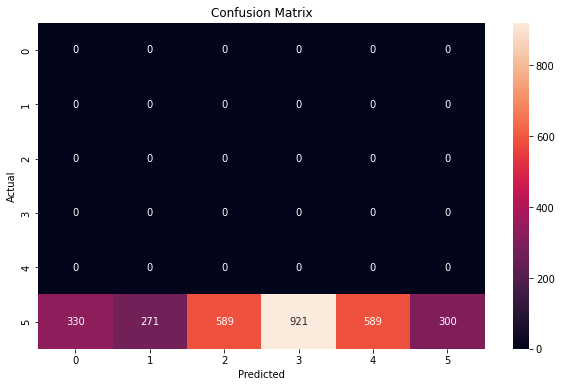

In [77]:
# Matrice de confusion
cm = confusion_matrix(y_test_data3, predicted_y)

matplot.subplots(figsize=(10, 6))
sb.heatmap(cm, annot = True, fmt = 'g')
matplot.xlabel("Predicted")
matplot.ylabel("Actual")
matplot.title("Confusion Matrix")
matplot.show()

In [80]:
liste_dict_intel

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}